In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [6]:
# Load the previously extracted data for each language
questions_java = pd.read_csv("questions_java.csv")
questions_python = pd.read_csv("questions_python.csv")
questions_cpp = pd.read_csv("questions_cpp.csv")

answers_java = pd.read_csv("answers_java.csv")
answers_python = pd.read_csv("answers_python.csv")
answers_cpp = pd.read_csv("answers_cpp.csv")


In [7]:
def combine_text_data(questions_df, answers_df):
    return questions_df['Title'] + ' ' + questions_df['Body'] + ' ' + answers_df['Body']

java_text = combine_text_data(questions_java, answers_java)
python_text = combine_text_data(questions_python, answers_python)
cpp_text = combine_text_data(questions_cpp, answers_cpp)


In [27]:
def preprocess_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Tokenize the text
        tokens = word_tokenize(text.lower())

        # Remove stop words and punctuation
        stop_words = set(stopwords.words("english"))
        tokens = [t for t in tokens if t.isalpha() and t not in stop_words and t != 'p']

        return tokens
    else:
        # Return an empty list if the text is not a string
        return []

java_tokens = [preprocess_text(text) for text in java_text]
python_tokens = [preprocess_text(text) for text in python_text]
cpp_tokens = [preprocess_text(text) for text in cpp_text]
 

In [28]:
def calculate_term_frequency(tokens):
    term_frequency = Counter(tokens)
    return term_frequency

java_term_frequency = calculate_term_frequency([token for sublist in java_tokens for token in sublist])
python_term_frequency = calculate_term_frequency([token for sublist in python_tokens for token in sublist])
cpp_term_frequency = calculate_term_frequency([token for sublist in cpp_tokens for token in sublist])


In [29]:
all_tokens = java_tokens + python_tokens + cpp_tokens


In [30]:
def calculate_term_frequency(tokens):
    term_frequency = Counter(tokens)
    return term_frequency

all_term_frequency = calculate_term_frequency([token for sublist in all_tokens for token in sublist])
java_term_frequency = calculate_term_frequency([token for sublist in java_tokens for token in sublist])
python_term_frequency = calculate_term_frequency([token for sublist in python_tokens for token in sublist])
cpp_term_frequency = calculate_term_frequency([token for sublist in cpp_tokens for token in sublist])


In [31]:
sorted_all_term_frequency = dict(sorted(all_term_frequency.items(), key=lambda item: item[1], reverse=True))
sorted_java_term_frequency = dict(sorted(java_term_frequency.items(), key=lambda item: item[1], reverse=True))
sorted_python_term_frequency = dict(sorted(python_term_frequency.items(), key=lambda item: item[1], reverse=True))
sorted_cpp_term_frequency = dict(sorted(cpp_term_frequency.items(), key=lambda item: item[1], reverse=True))


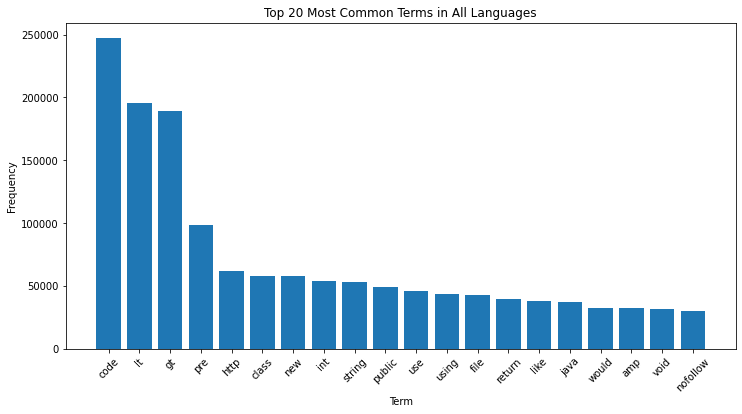

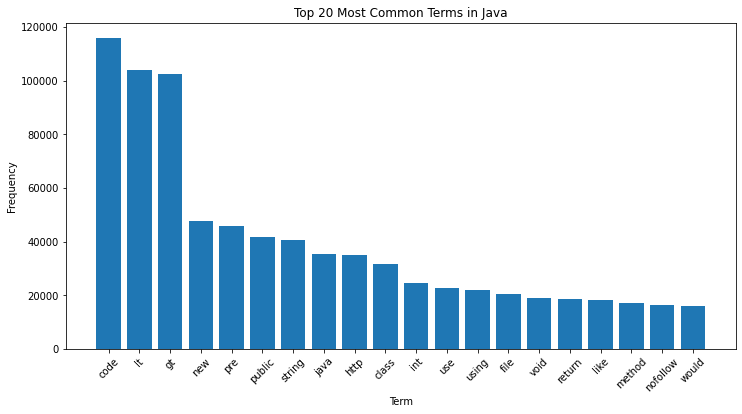

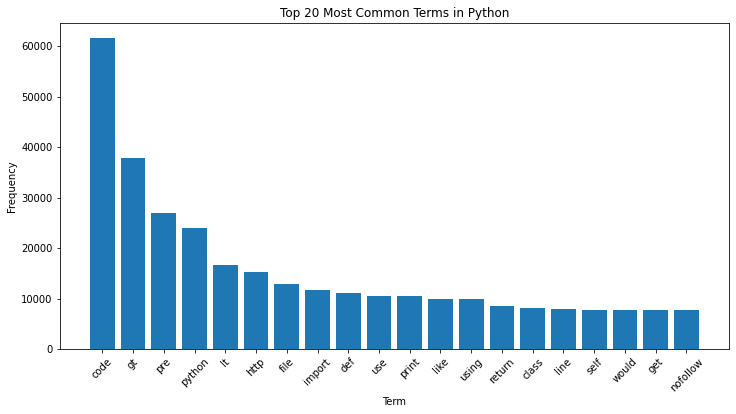

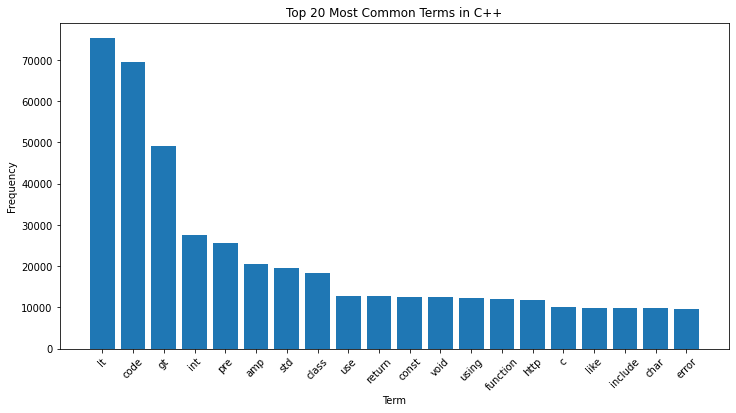

In [32]:
import matplotlib.pyplot as plt

def plot_term_frequency(term_frequency, language):
    top_n = 20
    terms = list(term_frequency.keys())[:top_n]
    frequency = list(term_frequency.values())[:top_n]

    plt.figure(figsize=(12, 6))
    plt.bar(terms, frequency)
    plt.xlabel('Term')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Common Terms in {language}')
    plt.xticks(rotation=45)
    plt.show()

# Plot term frequency for all languages
plot_term_frequency(sorted_all_term_frequency, 'All Languages')

# Plot term frequency for Java
plot_term_frequency(sorted_java_term_frequency, 'Java')

# Plot term frequency for Python
plot_term_frequency(sorted_python_term_frequency, 'Python')

# Plot term frequency for C++
plot_term_frequency(sorted_cpp_term_frequency, 'C++')
